<a href="https://colab.research.google.com/github/lakshh670/100_days_of_DeepLearning/blob/main/Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In this notebook we will implement the concept of dropout for a regression problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split


# Data Generation

In [2]:
x_train,x_test,y_train,y_test=np.linspace(-1,1,20),np.linspace(-1,1,20),np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485]),np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])



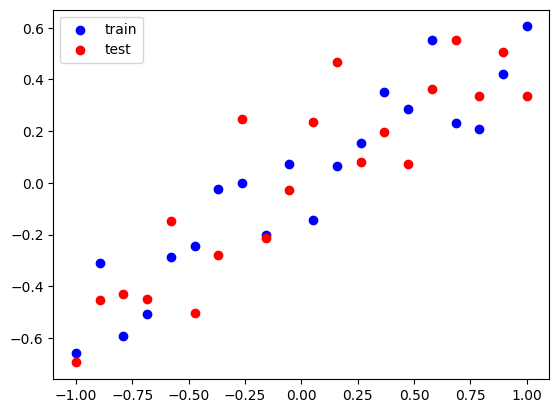

In [3]:
plt.scatter(x_train,y_train,c='blue',label='train')
plt.scatter(x_test,y_test,c='red',label='test')
plt.legend()
plt.show()

# Regression Model

In [10]:
model1=Sequential()
model1.add(Dense(128,input_dim=1,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model1.compile(loss='mse',optimizer=adam,metrics=['mse'])
# In model.compile(), the metrics parameter specifies which performance measures the model should calculate and report, in addition to the loss, during:
# Training (model.fit)
# Validation (val_…)
# Evaluation (model.evaluate)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history=model1.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test),verbose=True)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1124 - mse: 0.1124 - val_loss: 0.0300 - val_mse: 0.0300
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0201 - mse: 0.0201 - val_loss: 0.0495 - val_mse: 0.0495
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.0403 - mse: 0.0403 - val_loss: 0.0333 - val_mse: 0.0333
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0298 - val_mse: 0.0298
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0360 - val_mse: 0.0360
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0287 - val_mse: 0.0287
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0173 - m

In [13]:
# model evaluation
# model.evaluate() returns the values of the loss function and all the metrics you specified in model.compile(), computed on the data you pass to it.
_,train_mse=model1.evaluate(x_train,y_train)
_,test_mse=model1.evaluate(x_test,y_test)
print(f"train_mse: {train_mse}, test_mse: {test_mse}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0040 - mse: 0.0040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0442 - mse: 0.0442
train_mse: 0.003971359226852655, test_mse: 0.04420202225446701


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


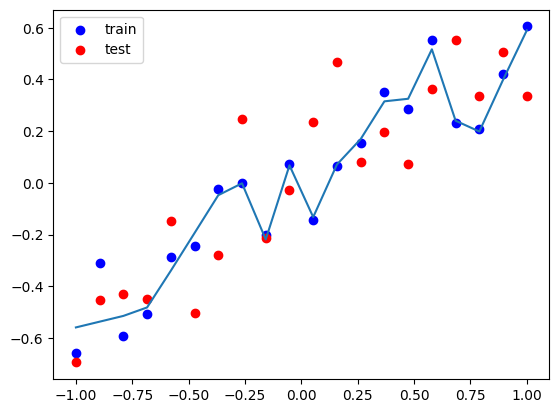

In [15]:
y_pred1=model1.predict(x_test)
plt.figure()
plt.scatter(x_train,y_train,c='blue',label='train')
plt.scatter(x_test,y_test,c='red',label='test')

plt.plot(x_test,y_pred1)
plt.legend()
plt.show()

# Dropout Model

In [17]:
from keras.layers import Dropout
model=Sequential()
model.add(Dense(128,input_dim=1,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))
adam=Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=adam,metrics=['mse'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,verbose=True)

Epoch 1/500


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.1143 - mse: 0.1143 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0453 - mse: 0.0453 - val_loss: 0.0423 - val_mse: 0.0423
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0658 - mse: 0.0658 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0855 - mse: 0.0855 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0356 - val_mse: 0.0356
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.0401 - val_mse: 0.0401
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0436 - mse: 0.0436 - val_loss: 0.0404 - val_mse: 0.0404
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0296 - mse: 0.0296 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


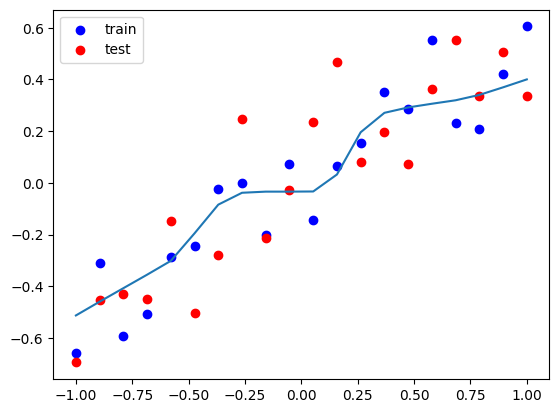

In [18]:
y_pred2=model.predict(x_test)
plt.figure()
plt.scatter(x_train,y_train,c='blue',label='train')
plt.scatter(x_test,y_test,c='red',label='test')

plt.plot(x_test,y_pred2)
plt.legend()
plt.show()